# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

Here are a few ideas for going beyond the requirements outlined in the rubric.

AUGMENT THE TRAINING DATA
Augmenting the training set might help improve model performance. Common data augmentation techniques include rotation, translation, zoom, flips, and/or color perturbation. These techniques can be used individually or combined.

ANALYZE NEW IMAGE PERFORMANCE IN MORE DETAIL
Calculating the accuracy on these five German traffic sign images found on the web might not give a comprehensive overview of how well the model is performing. Consider ways to do a more detailed analysis of model performance by looking at predictions in more detail. For example, calculate the precision and recall for each traffic sign type from the test set and then compare performance on these five new images..

If one of the new images is a stop sign but was predicted to be a bumpy road sign, then we might expect a low recall for stop signs. In other words, the model has trouble predicting on stop signs. If one of the new images is a 100 km/h sign but was predicted to be a stop sign, we might expect precision to be low for stop signs. In other words, if the model says something is a stop sign, we're not very sure that it really is a stop sign.

Looking at performance of individual sign types can help guide how to better augment the data set or how to fine tune the model.

CREATE VISUALIZATIONS OF THE SOFTMAX PROBABILITIES
For each of the five new images, create a graphic visualization of the soft-max probabilities. Bar charts might work well.

VISUALIZE LAYERS OF THE NEURAL NETWORK
See Step 4 of the Iptyon notebook for details about how to do this.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import csv

# TODO: Fill this in based on where you saved the training and testing data
in_dir = 'traffic-signs-data'

training_file = in_dir + '/train.p'
validation_file= in_dir +  '/valid.p'
testing_file = in_dir + '/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np

# TODO: Number of training xamples
n_train_images = len(X_train)  

# TODO: Number of validation examples
n_validation_images = len(X_valid) 

# TODO: Number of testing examples.
n_test_images = len(X_test) 

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train_images)
print("Number of testing examples =", n_test_images)
print("Number of validation examples =", n_validation_images)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Number of validation examples = 4410
Image data shape = (32, 32, 3)
Number of classes = 43


In [3]:
#Save Image X_train[1900] to compare later
img_1900 = X_train[1900]

### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

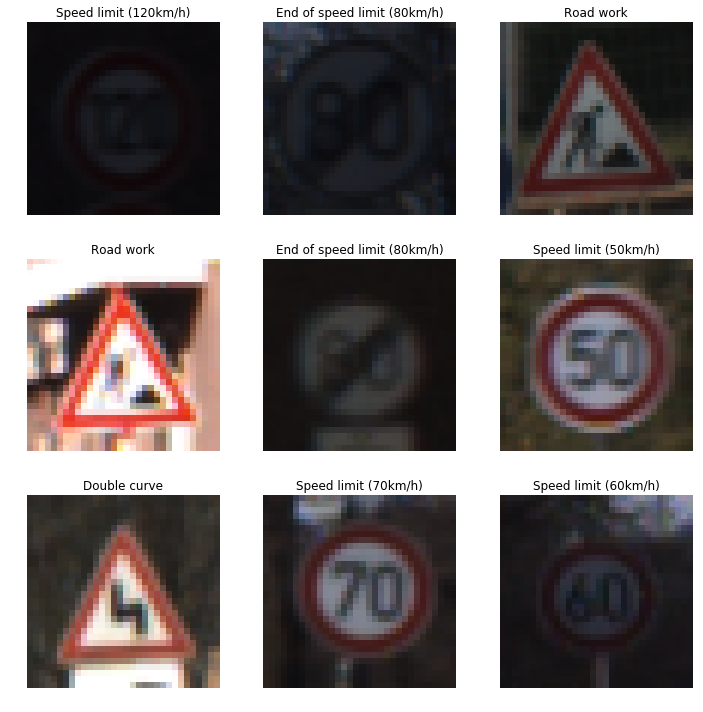

In [4]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import random
# Visualizations will be shown in the notebook.
%matplotlib inline


num_images_to_show = 9
display_img = {}
image_name = {}

#Extract sign image name from csv file
def sign_name(number):
    return np.genfromtxt('signnames.csv', skip_header=1, dtype=[('myint','i8'), ('mystring','S70')], \
           delimiter=',')[y_train[number]][1].decode('ascii')

def class_sign_name(classnumber):
    return np.genfromtxt('signnames.csv', skip_header=1, dtype=[('myint','i8'), ('mystring','S70')], \
           delimiter=',')[classnumber][1].decode('ascii')

#Plot random images function
def plot_random_images(img_in, num_images, labels=None, squeeze=False):
    img_size, axes = plt.subplots(ncols=int(np.sqrt(num_images)), nrows=int(np.sqrt(num_images)), figsize=(10, 10))
    axes = axes.ravel()
    for k, l in zip(range(len(img_in)), img_in):
        if squeeze==True:
            img_in[l] = img_in[l].squeeze()
        axes[k].imshow(img_in[l], plt.gray())
        axes[k].set_title(labels[k])
        axes[k].set_axis_off()  
    plt.tight_layout()

#Generate Random Images number to show
for n in range(num_images_to_show):
    random_image = random.randint(0, n_train_images-1)
    image_name[n] = sign_name(random_image)
    display_img[n] = X_train[random_image]
    

#Plot images and associated name
plot_random_images(display_img, num_images_to_show, image_name,squeeze=False)

Train Images number = 34799
Test Images number = 12630
Validation Images number = 4410


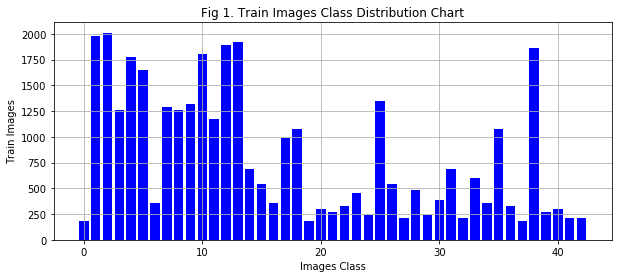

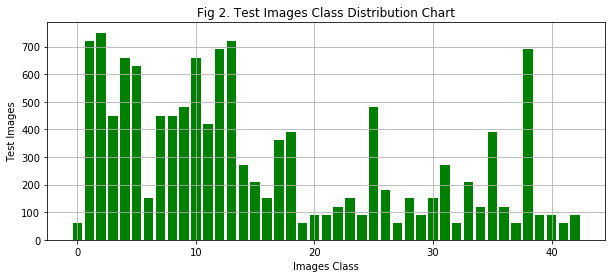

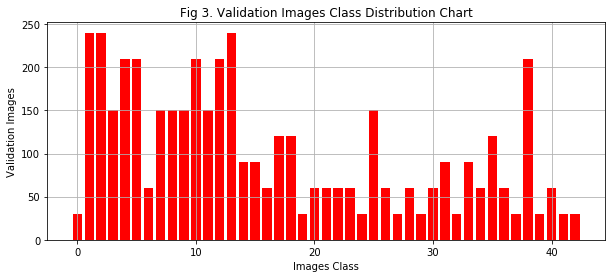

In [5]:
#Plot Bar function
def plot_image_dist_class(labels_, title,x_axis,y_axis, color):
    label_values, uniq_label_counts = np.unique(labels_, return_counts=True)
    plt.figure( facecolor='w', figsize=(10, 4))
    plt.bar(label_values, uniq_label_counts,color=color)
    plt.ylabel(y_axis)
    plt.xlabel(x_axis)
    plt.title(title)
    plt.grid(True)
    
#Plot test images on blue
plot_image_dist_class(y_train,'Fig 1. Train Images Class Distribution Chart','Images Class','Train Images','b')
print("Train Images number =",len(X_train) )

#Plot test images on green
plot_image_dist_class(y_test,'Fig 2. Test Images Class Distribution Chart','Images Class','Test Images','g')
print("Test Images number =",len(X_test) )

#Plot validation images on red
plot_image_dist_class(y_valid,'Fig 3. Validation Images Class Distribution Chart','Images Class','Validation Images','r')
print("Validation Images number =",len(X_valid) )

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [6]:
### Preprocess data here.

from scipy import ndimage
from numpy import newaxis
import cv2
import random

# Set Images to Greyscale
def grayscale(imagedata):
    grayscale_images = []
    for image in imagedata:
        grayscale_images.append(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY))   
    return np.array(grayscale_images)

# Set Single Images to Greyscale
def grayscalesingle(imagedata): 
    return cv2.cvtColor(imagedata, cv2.COLOR_BGR2GRAY)


# Normalized images to [0:1] minimum 0 and maximum 1.
def normalized(data):
    data_normalized = data[..., newaxis] / 255 * 0.8 + 0.08
    return data_normalized

# Rotating process. PreDefine rotating angles. 
minval=-20
maxval=20
minskip=-1
maxskip=1
    
def selected_rotation(selected_images,class_images):   
    rotate_angles = list(range(minval,minskip)) + list(range(maxskip,maxval))
    random_image= random.randint ( 0, (class_images - 1))   
    return ndimage.rotate(X_train[selected_images][random_image],random.choice(rotate_angles), reshape=False)

def selected_rotation_single(selected_images):
    rotate_angles = list(range(minval,minskip)) + list(range(maxskip,maxval))
    return ndimage.rotate(selected_images,random.choice(rotate_angles), reshape=False)

print(115*'-')

#Original Train Data
print('Original train data information... ')
print('min :',np.min(X_train), end='  ')
print('max :',np.max(X_train), end='  ')
print('mean :',np.mean(X_train), end='  ')
print('variance :',np.var(X_train), end='  ')
print('shape:',X_train.shape)

#Original Test Data
print('Original test data information.... ')
print('min :',np.min(X_test), end='  ')
print('max :',np.max(X_test), end='  ')
print('mean :',np.mean(X_test), end='  ')
print('variance :',np.var(X_test), end='  ')
print('shape:', X_test.shape)

print(115*'-')

#Normalized Train Data
X_train = normalized(grayscale(X_train))
print('Normalized train data information... ')
print('min :',np.min(X_train), end='  ')
print('max :',np.max(X_train), end='  ')
print('mean :',np.mean(X_train), end='  ')
print('variance :',np.var(X_train), end='  ')
print('shape:',X_train.shape)

#Normalized Test Data
X_test = normalized(grayscale(X_test)) 
print('Normalized test data information.... ')
print('min :',np.min(X_test), end='  ')
print('max :',np.max(X_test), end='  ')
print('mean :',np.mean(X_test), end='  ')
print('variance :',np.var(X_test), end='  ')
print('shape:', X_test.shape)
print(115*'-')



-------------------------------------------------------------------------------------------------------------------
Original train data information... 
min : 0  max : 255  mean : 82.677589037  variance : 4603.74306024  shape: (34799, 32, 32, 3)
Original test data information.... 
min : 0  max : 255  mean : 82.1484603612  variance : 4725.74982939  shape: (12630, 32, 32, 3)
-------------------------------------------------------------------------------------------------------------------
Normalized train data information... 
min : 0.0894117647059  max : 0.88  mean : 0.334169338876  variance : 0.0429294810697  shape: (34799, 32, 32, 1)
Normalized test data information.... 
min : 0.0925490196078  max : 0.88  mean : 0.332533292241  variance : 0.044142612599  shape: (12630, 32, 32, 1)
-------------------------------------------------------------------------------------------------------------------


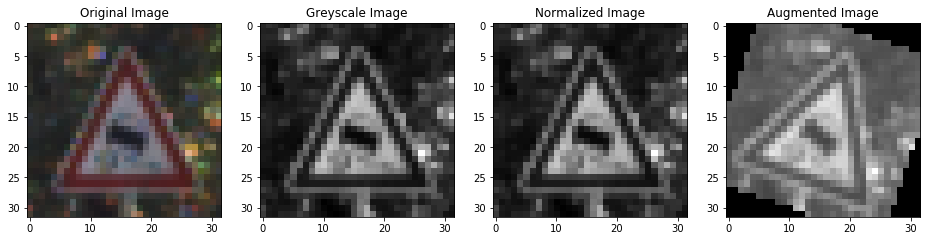

In [7]:
#Visualize Image processing method.
plt.figure(figsize=(16,16))
plt.subplot(3,4,1)
plt.imshow(img_1900)
plt.title('Original Image')
plt.subplot(3,4,2)
plt.imshow(grayscalesingle(img_1900))
plt.title('Greyscale Image')
plt.subplot(3,4,3)
plt.imshow((normalized(grayscalesingle(img_1900))).squeeze())
plt.title('Normalized Image')
plt.subplot(3,4,4)
plt.imshow(selected_rotation_single((normalized(grayscalesingle(img_1900))).squeeze()))
plt.title('Augmented Image')

In [8]:
### Generate additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

# Find distribution on imeges and maximum images on class
class_images = np.bincount(y_train)

print ('Maximum images in class',class_images.max())
print ()
print(115*'-')
print ('Print Original Images Distribution')
print ()
print (np.bincount(y_train))
print ()

for i in range(len(class_images)):
    
    # Calculate extra images per class
    if class_images[i] < class_images.max():
        
        selected_images = np.where(y_train == i)
        
        # Initialize extended images variable
        generated_X = []
        generated_y = []
        
        # Generate additional images
        for num in range(class_images.max()-class_images[i]):
            generated_X.append(selected_rotation(selected_images,class_images[i]))
            generated_y.append(i)
        
        # Append rotated images back to original
        X_train = np.append(X_train, np.array(generated_X), axis=0)
        y_train = np.append(y_train, np.array(generated_y), axis=0)
  

print(115*'-')
print ('Print Extended Images Number Distribution')
print ()
print (np.bincount(y_train))
print ()
print(115*'-')


Maximum images in class 2010

-------------------------------------------------------------------------------------------------------------------
Print Original Images Distribution

[ 180 1980 2010 1260 1770 1650  360 1290 1260 1320 1800 1170 1890 1920  690
  540  360  990 1080  180  300  270  330  450  240 1350  540  210  480  240
  390  690  210  599  360 1080  330  180 1860  270  300  210  210]

-------------------------------------------------------------------------------------------------------------------
Print Extended Images Number Distribution

[2010 2010 2010 2010 2010 2010 2010 2010 2010 2010 2010 2010 2010 2010 2010
 2010 2010 2010 2010 2010 2010 2010 2010 2010 2010 2010 2010 2010 2010 2010
 2010 2010 2010 2010 2010 2010 2010 2010 2010 2010 2010 2010 2010]

-------------------------------------------------------------------------------------------------------------------


In [9]:
#Check Train Data information again
print(115*'-')
print ()    
print('Extended train data information... ')
print('min :',np.min(X_train), end='  ')
print('max :',np.max(X_train), end='  ')
print('mean :',np.mean(X_train), end='  ')
print('variance :',np.var(X_train), end='  ')
print('shape:',X_train.shape)
print ()  
print(115*'-')

-------------------------------------------------------------------------------------------------------------------

Extended train data information... 
min : 0.0  max : 0.979667583571  mean : 0.31783089575  variance : 0.0456581364854  shape: (86430, 32, 32, 1)

-------------------------------------------------------------------------------------------------------------------


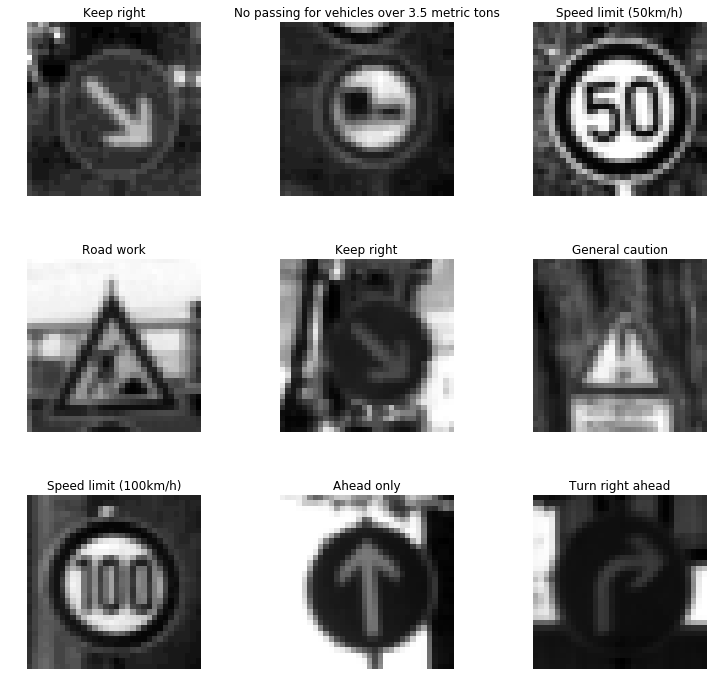

In [10]:
#Generate Normalized Random Images number to show
for n in range(num_images_to_show):
    random_image = random.randint(0, n_train_images-1)
    image_name[n] = sign_name(random_image)
    display_img[n] = X_train[random_image]

#Plot Normalized images and associated name
plot_random_images(display_img, num_images_to_show, image_name,squeeze=True)

The updated number of training examples = 86430


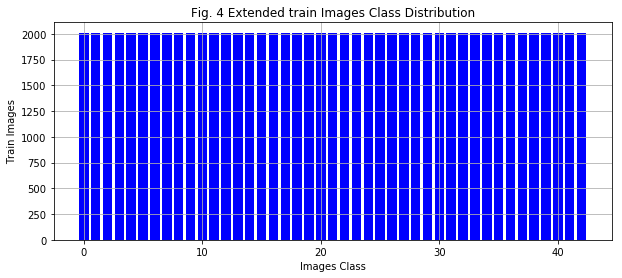

In [11]:
#Plot Class distribution of new train images on blue
plot_image_dist_class(y_train,'Fig. 4 Extended train Images Class Distribution','Images Class','Train Images','b')
print("The updated number of training examples =", len(X_train))

#### 1. Describe how you preprocessed the image data. What techniques were chosen and why did you choose these techniques?


Image preprocessing method I used consist of :

* Converted images to greyscale - original images (32,32,3) to grayscale (32,32,1). As suggested [here](https://stackoverflow.com/questions/20473352/is-conversion-to-gray-scale-a-necessary-step-in-image-preprocessing) processing image on grayscale tend to yield a faster processing compare to color. Another reference [here](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf) from Pierre Sermanet and Yann LeCun.
* Normalized images as suggested on Udacity lesson 6.23 Introduction to tensorflow - Normalized input to [0:1]. We want input images to have 0 means to allow optimizer to get best result. Normalized image process resulting image mean around 0.31. Another reading reference [here](https://www.imagemagick.org/discourse-server/viewtopic.php?t=26148).
* Generated extended train images. Fig 1 and fig 2 show original images distribution. As you you can see on the chart, some classes under presented. This may lead to accuracy problem when model doesn't have adequate traing sample. I decided generate some more images by rotation augmentation technique to achieve a well distribute images - Fig 4. Function def : selected_rotation used randomly selected angle from -20 to 20 and skip -1 to 1 degree.

### Model Architecture

In [12]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

In [13]:
import tensorflow as tf

EPOCHS = 150
BATCH_SIZE = 128
dropout_rate = 0.5

In [14]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

#Shuffle, split train data before feed to model
X_train, y_train = shuffle(X_train, y_train)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, stratify = y_train, test_size=0.1, random_state=23)


In [15]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

# The below is only necessary to reset if the notebook has not been shutdown
# This Architecture is adopted from Original Lenet mentioned in Class Lab. https://github.com/udacity/CarND-LeNet-Lab.

tf.reset_default_graph()

from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # Layer 1 - Convolutional. Input = 32x32x1 ==> Output = 28x28x6.
    conv1_weight = tf.Variable(tf.truncated_normal(shape = (5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_bias = tf.Variable(tf.zeros(6))
     
    # Apply convolution
    conv_layer1 = tf.nn.conv2d(x, conv1_weight, strides=[1, 1, 1, 1], padding='VALID', name='conv1') \
                + conv1_bias
        
    print  ('conv_layer1',conv_layer1.get_shape())
    
    # Activation layer 1
    conv_layer1 = tf.nn.relu(conv_layer1, name='conv1_relu')
    
    # Pooling. Input = 28x28x6 ==> Output = 14x14x6.
    conv_layer1 = tf.nn.avg_pool(conv_layer1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID',\
                                 name='conv1_pool')
    
    print  ('conv_layer1_pool',conv_layer1.get_shape())
    
    
    # Layer 2 - Convolutional. Input = 14x14x6. ==> Output = 10x10x16.
    conv2_weight = tf.Variable(tf.truncated_normal(shape = (5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_bias = tf.Variable(tf.zeros(16))
    
    # Convolutional layer 2
    conv_layer2 = tf.nn.conv2d(conv_layer1, conv2_weight, strides=[1, 1, 1, 1], padding='VALID', name='conv2')\
                + conv2_bias
        
    print  ('conv_layer2',conv_layer2.get_shape())
    
    # Activation layer 2
    conv_layer2 = tf.nn.relu(conv_layer2, name='conv2_relu')
    
    # Pooling. Input = 10x10x16 ==> Output = 5x5x16.
    conv_layer2 = tf.nn.avg_pool(conv_layer2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID', \
                                 name='conv2_pool')
    
    print  ('conv_layer2_pool',conv_layer2.get_shape())

    # Flatten. Fully connected layers. Input = 5x5x16 ==> Output = 400.
    flat = tf.contrib.layers.flatten(conv_layer2)
    
    print  ('flat shape',flat.get_shape())
    
    # Layer 3: Fully Connected. Input = 400 ==> Output = 200.
    #Original Lenet
    #fc1_weight = tf.Variable(tf.truncated_normal(shape = (400, 120), mean = mu, stddev = sigma))
    #fc1_bias = tf.Variable(tf.zeros(120))
    
    #Experimental with weight and bias
    fc1_weight = tf.Variable(tf.truncated_normal(shape = (400, 200), mean = mu, stddev = sigma))
    fc1_bias = tf.Variable(tf.zeros(200))
    
    fc1 = tf.matmul(flat, fc1_weight) + fc1_bias     # matrix multiplication
    
    print  ('fc1 shape',fc1.get_shape())
    
    # Activation. Fully connected layer.
    fc1 = tf.nn.relu(fc1)
    
    # Dropout
    fc1 = tf.nn.dropout(fc1, keep_prob)

    # Layer 4: Fully Connected. Input = 200. ==> Output = 100.
    
    #Original Lenet
    #fc2_weight = tf.Variable(tf.truncated_normal(shape = (120, 84), mean = mu, stddev = sigma))
    #fc2_bias = tf.Variable(tf.zeros(84))
    
    #Experimental with weight and bias
    fc2_weight = tf.Variable(tf.truncated_normal(shape = (200, 100), mean = mu, stddev = sigma))
    fc2_bias = tf.Variable(tf.zeros(100))

    fc2 = tf.matmul(fc1, fc2_weight) + fc2_bias     # matrix multiplication
    print  ('fc2 shape',fc2.get_shape())
    
    # Activation.
    fc2 = tf.nn.relu(fc2)
    
    # Dropout
    fc2 = tf.nn.dropout(fc2, keep_prob)
    
    # Layer 5 Fully Connected. Input = 100 ==> Output = 43.
    
    #Original Lenet
    #fc3_weight = tf.Variable(tf.truncated_normal(shape = (84, 43), mean = mu, stddev = sigma))
    
    #Experimental with weight and bias
    fc3_weight = tf.Variable(tf.truncated_normal(shape = (100, 43), mean = mu, stddev = sigma))
    
    fc3_bias = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_weight) + fc3_bias     # matrix multiplication
    print  ('logits shape',logits.get_shape())
     
    return logits

In [16]:
# Set placeholder variables for x, y, and the keep_prob for dropout
# Also, one-hot encode y
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, 43)

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

#### 2. Describe what your final model architecture looks like including model type, layers, layer sizes, connectivity, etc.)

Final architecture as follow:

### Architecture
<table>
<tr><td>**Layer**</td>
<td>**Name**</td>
<td>**Description**</td></tr>
    
<tr><td>**Layer 1: Convolutional**</td>
    <td>conv1</td>
<td>1x1 stride, Valid padding, Input 32x32x1 ==> Output 28x28x6</td></tr>

<tr><td>**Activation: ReLU **</td>
        <td>conv1_relu</td>
<td>ReLU - a rectified linear unit</td></tr>

<tr><td>**Pooling**</td>
        <td>conv1_pool</td>
<td>2x2 stride, Valid padding, Input 28x28x6 ==> Output 14x14x6</td></tr>

<tr><td>**Layer 2: Convolutional**</td>
        <td>conv2</td>
<td>1x1 stride, Valid padding, Input 14x14x6 ==> Output 10x10x16</td></tr>

<tr><td>**Activation: ReLU**</td>
        <td>conv2_relu</td>
<td>ReLU - a rectified linear unit</td></tr>

<tr><td>**Pooling**</td>
        <td>conv2_pool</td>
<td>2x2 stride, Valid padding, Input 10x10x16 ==> Output 5x5x16</td></tr>

<tr><td>**Flatten**</td>
        <td></td>
<td>Fully connected layers. Input 5x5x16. ==> Output 400.</td></tr>

<tr><td>**Layer 3: Fully connected**</td>
        <td></td>
<td>Fully Connected. Input = 400. ==> Output = 200.</td></tr>

<tr><td>**Activation: ReLU**</td>
        <td></td>
<td>ReLU - a rectified linear unit</td></tr>

<tr><td>**Dropout operation**</td>
        <td></td>
<td>Dropout</td></tr>

<tr><td>**Layer 4: Fully connected**</td>
        <td></td>
<td>Fully Connected. Input 200. ==> Output 100.</td></tr>

<tr><td>**Activation: ReLU**</td>
        <td></td>
<td>ReLU - a rectified linear unit</td></tr>

<tr><td>**Dropout operation**</td>
        <td></td>
<td>Dropout</td></tr>

<tr><td>**Layer 5: Fully Connected**</td>
        <td></td>
<td>Fully Connected. Input 100. ==> Output = 43.</td></tr>


</table>

In [17]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

In [18]:
# Setting learning rate, loss functions, and optimizer
rate = 0.0008

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

conv_layer1 (?, 28, 28, 6)
conv_layer1_pool (?, 14, 14, 6)
conv_layer2 (?, 10, 10, 16)
conv_layer2_pool (?, 5, 5, 16)
flat shape (?, 400)
fc1 shape (?, 200)
fc2 shape (?, 100)
logits shape (?, 43)


In [19]:
# The below is used in the validation part of the neural network
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy =  sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob : 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [20]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print(115*'-')
    print()
    print("Training...  ")
    print()
    print ('EPOCH =',EPOCHS)
    print ('Batch Size =',BATCH_SIZE)
    print ('Dropout Rate=',dropout_rate)
    print ('Learning rate=',rate)
    print()
    print()
    print(115*'-')

    for i in range(EPOCHS):
        print("EPOCH {} ...".format(i+1), end='  ')
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            loss = sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob : dropout_rate})
            
        training_accuracy = evaluate(X_train, y_train)
        validation_accuracy = evaluate(X_valid, y_valid)
        test_accuracy = evaluate(X_test, y_test)
        
        print("Training Accuracy = {:.3f}".format(training_accuracy), end='  ')
        print("Validation Accuracy = {:.3f}".format(validation_accuracy), end='  ')
        print("Test Accuracy = {:.3f}".format(test_accuracy))
        
    saver.save(sess, './lenet')
    print("Model saved")

-------------------------------------------------------------------------------------------------------------------

Training...  

EPOCH = 150
Batch Size = 128
Dropout Rate= 0.5
Learning rate= 0.0008


-------------------------------------------------------------------------------------------------------------------
EPOCH 1 ...  Training Accuracy = 0.762  Validation Accuracy = 0.759  Test Accuracy = 0.695
EPOCH 2 ...  Training Accuracy = 0.851  Validation Accuracy = 0.847  Test Accuracy = 0.776
EPOCH 3 ...  Training Accuracy = 0.901  Validation Accuracy = 0.897  Test Accuracy = 0.819
EPOCH 4 ...  Training Accuracy = 0.927  Validation Accuracy = 0.922  Test Accuracy = 0.850
EPOCH 5 ...  Training Accuracy = 0.941  Validation Accuracy = 0.940  Test Accuracy = 0.865
EPOCH 6 ...  Training Accuracy = 0.953  Validation Accuracy = 0.950  Test Accuracy = 0.873
EPOCH 7 ...  Training Accuracy = 0.964  Validation Accuracy = 0.957  Test Accuracy = 0.887
EPOCH 8 ...  Training Accuracy = 0.971  Vali

EPOCH 87 ...  Training Accuracy = 1.000  Validation Accuracy = 0.996  Test Accuracy = 0.946
EPOCH 88 ...  Training Accuracy = 0.999  Validation Accuracy = 0.996  Test Accuracy = 0.948
EPOCH 89 ...  Training Accuracy = 1.000  Validation Accuracy = 0.996  Test Accuracy = 0.945
EPOCH 90 ...  Training Accuracy = 0.999  Validation Accuracy = 0.996  Test Accuracy = 0.944
EPOCH 91 ...  Training Accuracy = 1.000  Validation Accuracy = 0.996  Test Accuracy = 0.947
EPOCH 92 ...  Training Accuracy = 1.000  Validation Accuracy = 0.996  Test Accuracy = 0.946
EPOCH 93 ...  Training Accuracy = 1.000  Validation Accuracy = 0.995  Test Accuracy = 0.947
EPOCH 94 ...  Training Accuracy = 1.000  Validation Accuracy = 0.997  Test Accuracy = 0.950
EPOCH 95 ...  Training Accuracy = 0.999  Validation Accuracy = 0.996  Test Accuracy = 0.948
EPOCH 96 ...  Training Accuracy = 1.000  Validation Accuracy = 0.996  Test Accuracy = 0.948
EPOCH 97 ...  Training Accuracy = 1.000  Validation Accuracy = 0.997  Test Accur

In [21]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.950


#### 3. Describe how you trained your model. The discussion can include the type of optimizer, the batch size, number of epochs and                any hyperparameters such as learning rate.

I trained the model using Adam optimizer and Lenet architecture since augmented data is already normalized on grayscale. Following is a table show parameter used and accuracy. Note : Please refer to def Lenet section to find out original and experimental Lenet (mod Lenet). Experimental Lenet focus on different shape after second layer flatten process.


<table>
  <tr>
    <th>Date</th>
    <th>Architecture</th>
    <th>Epoch</th>
    <th>Batch Size</th>
    <th>Rate</th>
    <th>Mu</th>
    <th>Sigma</th>
    <th>Dropout</th>
    <th>Preprocess</th>
    <th>Validation Accuracy</th>
    <th>Test Accuracy</th>
    <th>Observation and Action</th>
  </tr>
   <tr>
    <td>2017/09/22</td>
    <td>Original Lenet</td>
    <td>10</td>
    <td>128</td>
    <td>0.0009</td>
    <td>0</td>
    <td>0.1</td>
    <td>1.0</td>
    <td>Normalized, grayscale, randomize, rotate : generate additional image </td>
    <td>97.40%</td>
        <td>86.20%</td>
    <td></td>
  </tr>
     <tr>
    <td>2017/09/22</td>
    <td>Mod Lenet</td>
    <td>10</td>
    <td>128</td>
    <td>0.0009</td>
    <td>0</td>
    <td>0.1</td>
    <td>1.0</td>
    <td>Normalized, grayscale, randomize, rotate : generate additional image </td>
    <td>97.50%</td>
        <td>85.90%</td>
    <td>It wasn't much different with orginal Lenet. Validation accuracy increased but test accuracy slighly decreased. I settled with this architecture for now and change more parameter.</td>
  </tr>
    
  <tr>
    <td>2017/09/22</td>
    <td>Mod Lenet</td>
    <td>25</td>
    <td>128</td>
    <td>0.0009</td>
    <td>0</td>
    <td>0.1</td>
    <td>0.5</td>
    <td>Normalized, grayscale, randomize, rotate : generate additional image </td>
    <td>99.30%</td>
        <td>93.40%</td>
    <td>Reach 93.4% test accuracy. </td>
  </tr>
   
    
   <tr>
    <td>2017/09/23</td>
    <td>Mod Lenet</td>
    <td>50</td>
    <td>128</td>
    <td>0.0009</td>
    <td>0</td>
    <td>0.1</td>
    <td>0.5</td>
    <td>Normalized, grayscale, randomize, rotate : generate additional image </td>
    <td>99.50%</td>
        <td>93.90%</td>
    <td></td>
  </tr>
    
   <tr>
    <td>2017/09/23</td>
    <td>Mod Lenet</td>
    <td>50</td>
    <td>128</td>
    <td>0.0008</td>
    <td>0</td>
    <td>0.1</td>
    <td>0.5</td>
    <td>Normalized, grayscale, randomize, rotate : generate additional image </td>
    <td>99.50%</td>
       <td>93.50%</td>
    <td></td>
  </tr>
  
  <tr>
    <td>2017/09/27</td>
    <td>Mod Lenet</td>
    <td>100</td>
    <td>128</td>
    <td>0.0008</td>
    <td>0</td>
    <td>0.1</td>
    <td>0.5</td>
    <td>Normalized, grayscale, randomize, rotate : generate additional image</td>
    <td>99.70%</td>
       <td>94.50%</td>
    <td></td>
  </tr>
      <tr>
    <td>2017/10/01</td>
    <td>Mod Lenet</td>
    <td>150</td>
    <td>128</td>
    <td>0.0008</td>
    <td>0</td>
    <td>0.1</td>
    <td>0.5</td>
    <td>Normalized, grayscale, randomize, rotate : generate additional image</td>
    <td>99.7%</td>
        <td>95.00%</td>
    <td></td>
  </tr>
  
</table>

#### 4. Describe the approach taken for finding a solution and getting the validation set accuracy to be at least 0.93. Include

I started with LeNet architecture because of simplicity. After first iteration I observed the model tended to overshoot. I played with some parameter to get maximum validation accuracy (see observation table above). At the end I settle with Epoch 150, batch size, 128, learing rate 0.0008 and dropout rate=0.5. Final validation accuracy 99.7% and testing accuracy 95.00%.


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

In [22]:
# Reinitialize and re-import if starting a new kernel here
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

### Load and Output the Images

In [23]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

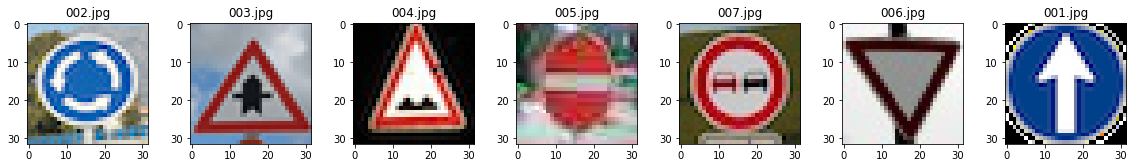

In [24]:
#read extra sign traffic image
import glob
import cv2

#Initalized table parameter
x_img_row=1
x_img_col=7
x_img_size_w=16
x_img_size_l=16

xrtafig, xtraxis = plt.subplots(x_img_row,x_img_col, figsize=(x_img_size_w, x_img_size_l), facecolor='w')
extra_dir = 'extra/'
xrtafig.tight_layout()

#Initalized extra placeholder
extra_images = []

for i, xtraimg in enumerate(glob.glob(extra_dir +'*.jpg')):
    image = cv2.imread(xtraimg)
    xtraxis[i].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    xtraxis[i].set_title(xtraimg[-7:])
    extra_images.append(image)
    
#normalized etra images
images_normalized= normalized(grayscale(extra_images))

In [25]:
#Check Extra Sign data information
print(115*'-')
print()
print('Train data information... ')
print('min :',np.min(images_normalized), end='  ')
print('max :',np.max(images_normalized), end='  ')
print('mean :',np.mean(images_normalized), end='  ')
print('variance :',np.var(images_normalized), end='  ')
print('shape:',images_normalized.shape)
print()
print(115*'-')


-------------------------------------------------------------------------------------------------------------------

Train data information... 
min : 0.08  max : 0.88  mean : 0.461678483894  variance : 0.0563931406338  shape: (7, 32, 32, 1)

-------------------------------------------------------------------------------------------------------------------


#### 1. Choose five German traffic signs found on the web and provide them in the report. For each image, discuss what quality or qualities might be difficult to classify.

Found some German traffic sign images online. The size, quality of images are vary with much more background. I run same pre-processing process on all images. Post process images shape is min : 0.08  max : 0.88  mean : 0.461678483894  variance : 0.0563931406338 shape: (7, 32, 32, 1)
* 1st and 4th image has a black background.
* 2nd, 3rd, 5th and 7th has color background.
* 6th has a white background.
* 2nd and 5th also slanted.

Model may have problem identify some image with more color background, shadows or obstructing objects. I pick white, black and color background to test model accuracy. 

### Predict the Sign Type for Each Image

In [26]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

### Extra Images Class

<table>
  <tr>
    <th>Name</th>
    <th>True Class ID</th>
    <th>Description</th>
    <th> Note </th>
  </tr>
  <tr>
    <td>001.jpg</td>
    <td>35</td>
    <td>Ahead Only</td>
    <td></td>
  </tr>
  <tr>
    <td>002.jpg</td>
    <td>40</td>
    <td>Roundabout mandatory</td>
    <td></td>
  </tr>
  <tr>
    <td>003.jpg</td>
    <td>11</td>
    <td>Right-of-way at the next intersection</td>
    <td></td>
  </tr>
  <tr>
    <td>004.jpg</td>
    <td>22</td>
    <td>Bumpy road</td>
    <td></td>
  </tr>
  <tr>
    <td>005.jpg</td>
    <td>17</td>
    <td>No Entry</td>
    <td></td>
  </tr>
   <tr>
    <td>006.jpg</td>
    <td>13</td>
    <td>Yield</td>
    <td></td>
  </tr>
   <tr>
    <td>007.jpg</td>
    <td>9</td>
    <td>No Passing</td>
    <td></td>
  </tr>
</table>


Image Class Reference:

Class 0 Speed limit (20km/h)
Class 1 Speed limit (30km/h)
Class 2 Speed limit (50km/h)
Class 3 Speed limit (60km/h)
Class 4 Speed limit (70km/h)
Class 5 Speed limit (80km/h)
Class 6 End of speed limit (80km/h)
Class 7 Speed limit (100km/h)
Class 8 Speed limit (120km/h)
Class 9 No passing
Class 10 No passing for vehicles over 3.5 metric tons
Class 11 Right-of-way at the next intersection
Class 12 Priority road
Class 13 Yield
Class 14 Stop
Class 15 No vehicles
Class 16 Vehicles over 3.5 metric tons prohibited
Class 17 No entry
Class 18 General caution
Class 19 Dangerous curve to the left
Class 20 Dangerous curve to the right
Class 21 Double curve
Class 22 Bumpy road
Class 23 Slippery road
Class 24 Road narrows on the right
Class 25 Road work
Class 26 Traffic signals
Class 27 Pedestrians
Class 28 Children crossing
Class 29 Bicycles crossing
Class 30 Beware of ice/snow
Class 31 Wild animals crossing
Class 32 End of all speed and passing limits
Class 33 Turn right a

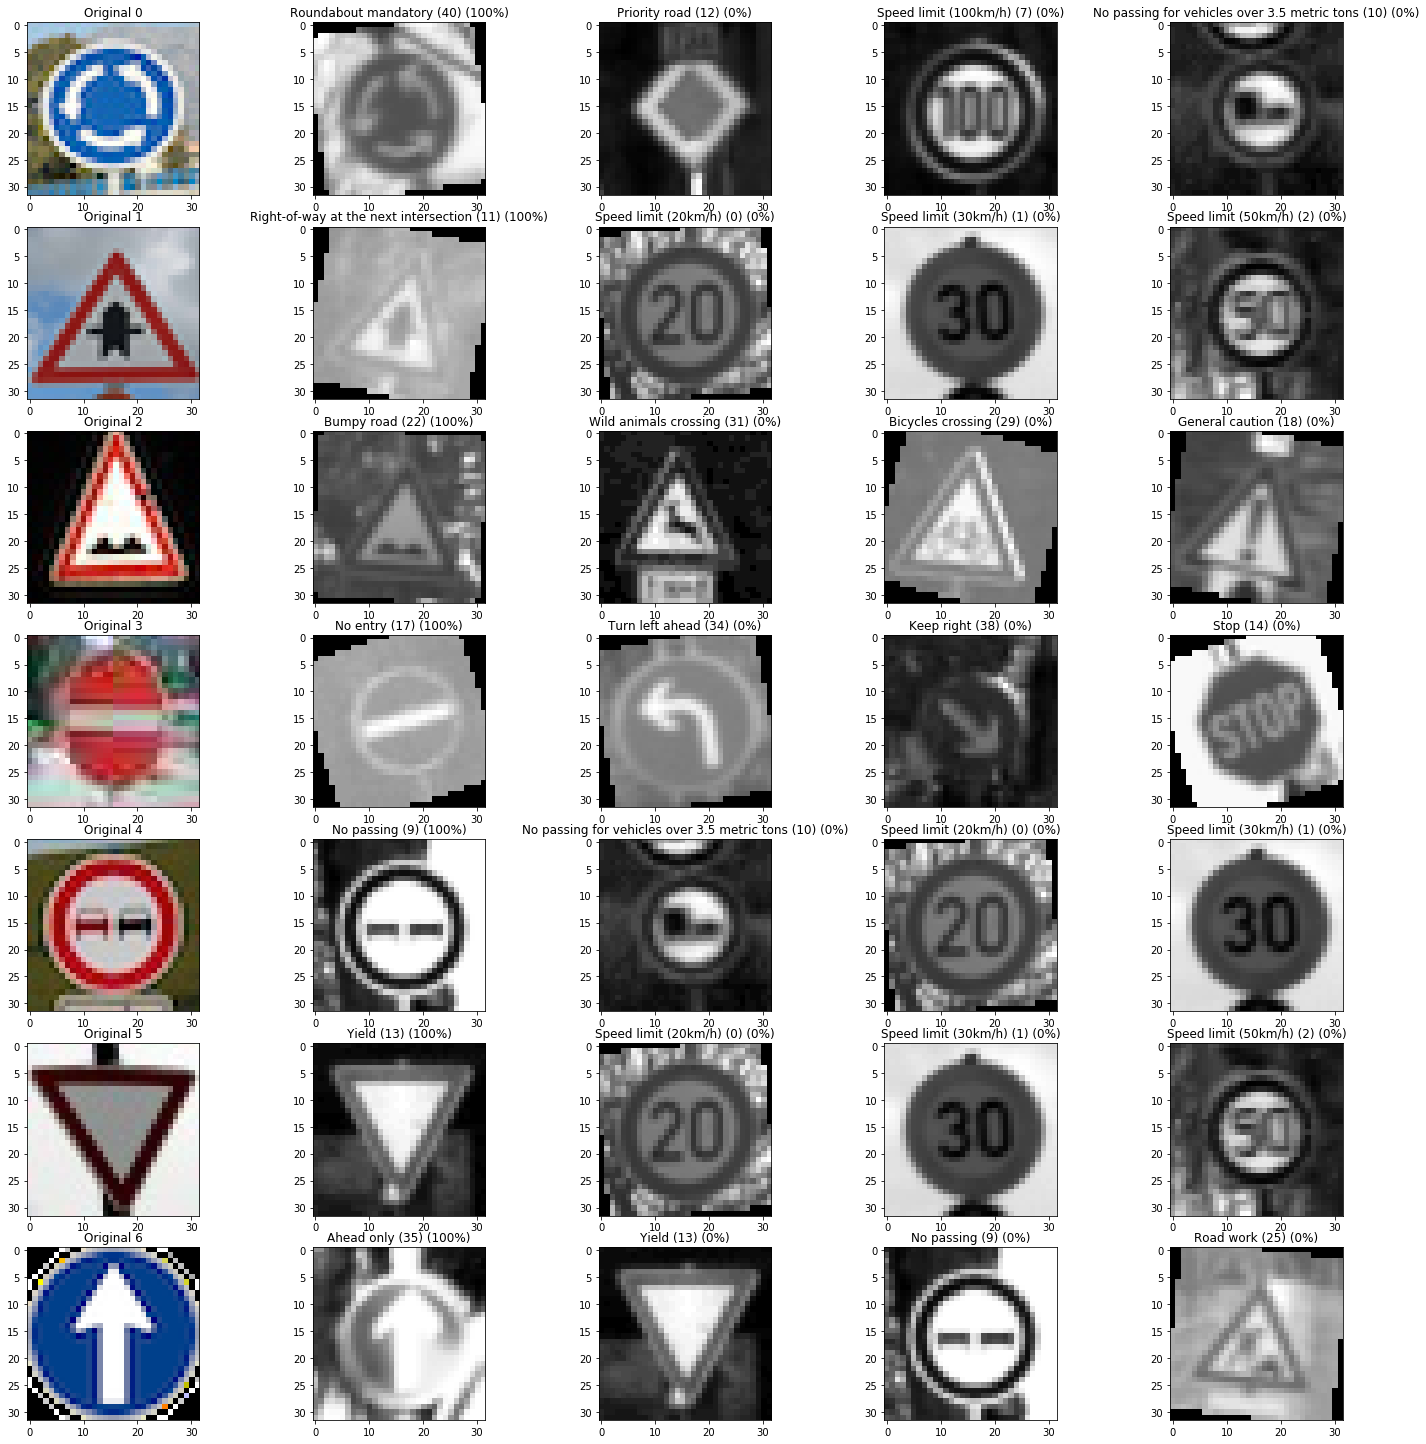

In [27]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

#Print Image Class
print ()
print ('Image Class Reference:')
print ()
for image_c in range (n_classes):
    print ('Class',image_c, end=' ')
    print (class_sign_name(image_c))

#Initialized sofmax and table parameter
vizual_softmax = tf.nn.softmax(logits)
topk_extra = tf.nn.top_k(vizual_softmax, k=5)
xtra_img_col=5
xtra_img_w=20
xtra_img_l=20
        
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    import_sess = tf.train.import_meta_graph('./lenet.meta')
    import_sess.restore(sess, "./lenet")
    vizual_softmax = sess.run(vizual_softmax, feed_dict={x: images_normalized, keep_prob: 1.0})
    pred_top_k = sess.run(topk_extra, feed_dict={x: images_normalized, keep_prob: 1.0})

    
    fig, xtraxis = plt.subplots(len(extra_images),xtra_img_col, figsize=(xtra_img_w, xtra_img_l))
    fig.tight_layout()
    axis = xtraxis.ravel()
    
    print ()
    print ('Extra Softmax Images Predictions:')
    print ()
    
    indent=0
    
    for i, xtraimage in enumerate(extra_images):
        indent=xtra_img_col*i
        
        axis[indent].imshow(cv2.cvtColor(xtraimage, cv2.COLOR_BGR2RGB))
        axis[indent].set_title('Original ' + str(i))
        
        for j in range(0,xtra_img_col-1):
        
            img_idx = np.argwhere(y_valid == pred_top_k[1][i][j])[0]
            axis[indent +(j+1)].imshow(X_valid[img_idx].squeeze(), cmap='gray')
            axis[indent +(j+1)].set_title('{} ({}) ({:.0f}%)'.format(class_sign_name(pred_top_k[1][i][j]),\
                    (pred_top_k[1][i][j]), 100*pred_top_k[0][i][j]))


### Analyze Performance

In [28]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

### Extra Images Model Accuracy Vs Prediction.

<table>
  <tr>
    <th>Images </th>
    <th>Correct Class ID</th>
      <th>1st Guess</th>
      <th>2nd Guess</th>
      <th>3rd Guess</th>
 
    <th> Note </th>
  </tr>
  <tr>
    <td>001.jpg</td>
    <td>Ahead Only (35) </td>
     <td>Ahead Only (35) 100%</td>
      <td></td>
       <td></td>
 
    <td>1st guess is correct</td>
  </tr>
  <tr>
    <td>002.jpg</td>
    <td>Roundabout mandatory (40)</td>
    <td>Roundabout mandatory (40) 100%</td>
     <td></td>
    <td></td>
 
     <td>1st guess is correct</td>
  </tr>
  <tr>
    <td>003.jpg</td>
    <td>Right-of-way at the next intersection (11)</td>
    <td>Right-of-way at the next intersection (11) 100%</td>
     <td></td>
    <td></td>

    <td>1st guess is correct</td>
  </tr>
  <tr>
    <td>004.jpg</td>
    <td>Bumpy Road (22)</td>
     <td>Bumpy Road (22) 100%</td>
        <td></td>
     <td></td>

    <td>1st guess is correct</td>
  </tr>
  <tr>
    <td>005.jpg</td>
    <td>No Entry (17)</td>
    <td>No Entry (17) 100%</td>
          <td></td>
    <td></td>
    <td>1st guess is correct</td>
  </tr>
    <tr>
    <td>006.jpg</td>
    <td>Yield (13)</td>
    <td>Yield (13) 100%</td>
          <td></td>
    <td></td>
    <td>1st guess is correct</td>
  </tr>
  
    <tr>
    <td>007.jpg</td>
    <td>No Passing (9)</td>
    <td>No Passing (9) 100%</td>
          <td></td>
    <td></td>
    <td>1st guess is correct</td>
  </tr>
  
</table>

#### Accuracy is 100% for extra images

#### 2. Discuss the model's predictions on these new traffic signs and compare the results to predicting on the test set. 

At minimum, discuss what the predictions were, the accuracy on these new predictions, and compare the accuracy to the
accuracy on the test set (OPTIONAL: Discuss the results in more detail as described in the "Stand Out Suggestions" part of the
rubric).

Model able to recognized sign accurately even with white, black and color background. Model also able to identify slanted image accurately.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

In [29]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

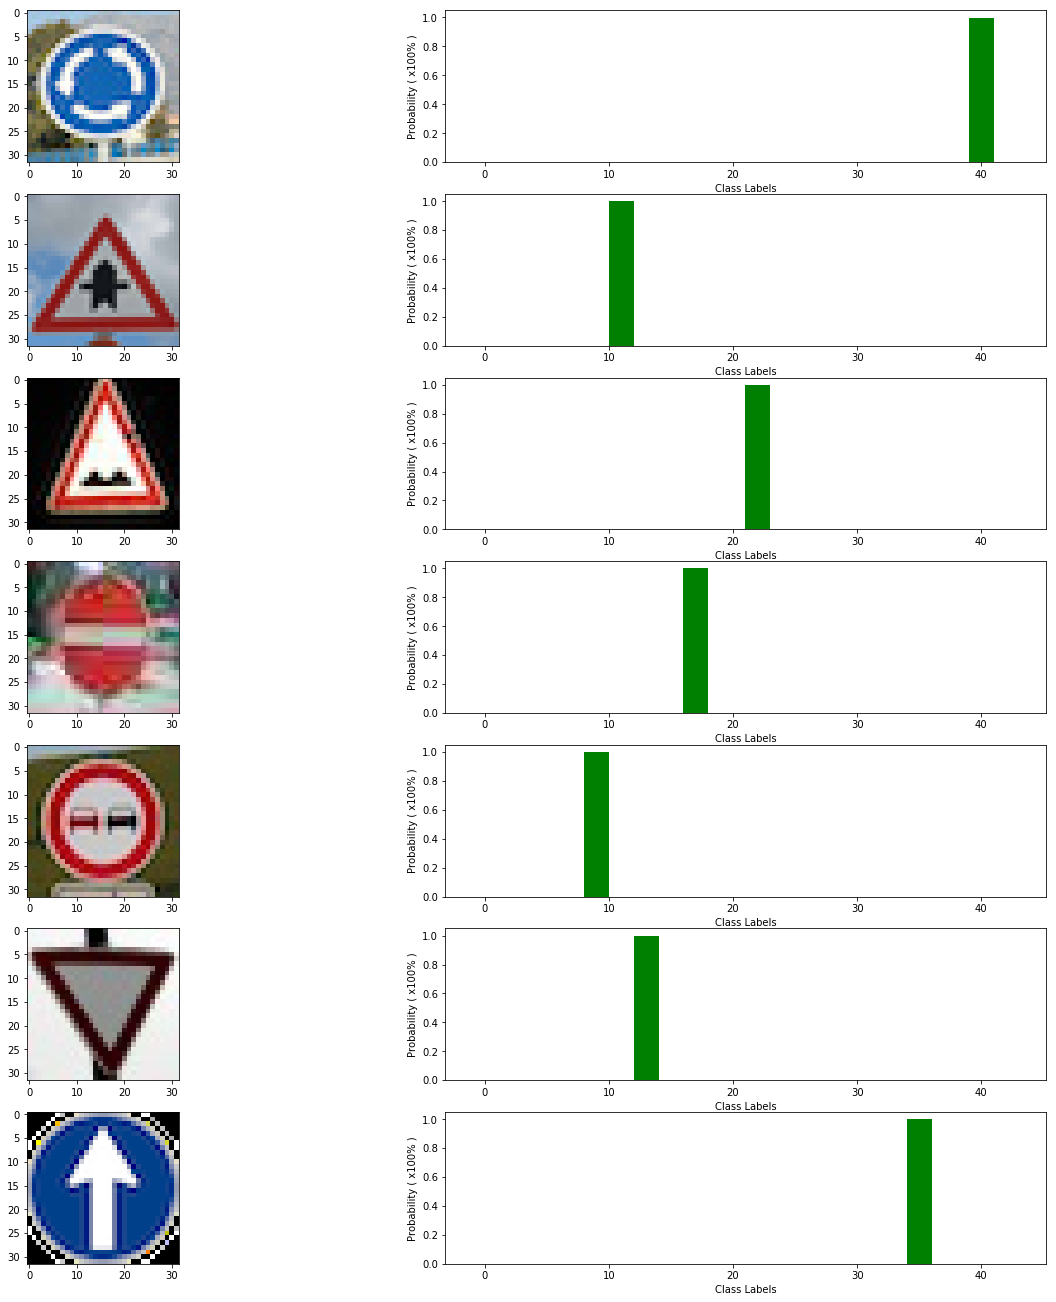

In [30]:
# Initialize column and rows
xtra_img_pro_col=2
xtra_img_pro_row=7

# Initialize picture size
xtra_img_pro_w=18
xtra_img_pro_l=18


# Initialize column and rows
fig, axs = plt.subplots(xtra_img_pro_row,xtra_img_pro_col, figsize=(xtra_img_pro_w, xtra_img_pro_l))
fig.tight_layout()
axs = axs.ravel()

for i in range(0,len(vizual_softmax)*2,2):
    axs[i].imshow(cv2.cvtColor(extra_images[i//2], cv2.COLOR_BGR2RGB))
    axs[i+1].bar(np.arange(n_classes), vizual_softmax[(i)//2],2, color='G') 
    axs[i+1].set_ylabel('Probability ( x100% )')
    axs[i+1].set_xlabel('Class Labels') 

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 

In [31]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(18,18))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")


### Neural Network's State
#### Convolution Layer 1 :

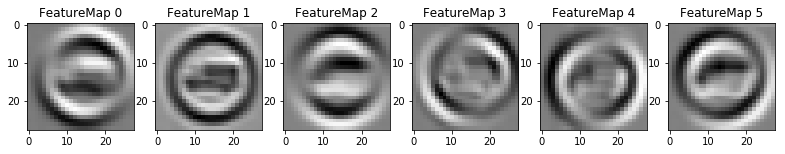

In [32]:
with tf.Session() as sess:
    X_final_graph = X_test
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    conv_layer1 = sess.graph.get_tensor_by_name('conv1:0')
    outputFeatureMap(X_final_graph,conv_layer1, activation_min=-1, activation_max=-1, plt_num=1)

#### Activation Relu 1 :

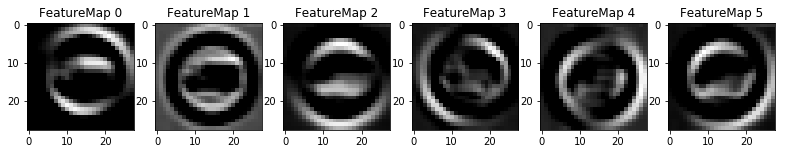

In [33]:
with tf.Session() as sess:
    X_final_graph = X_test
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    relu_layer1 = sess.graph.get_tensor_by_name('conv1_relu:0')
    outputFeatureMap(X_final_graph,relu_layer1, activation_min=-1, activation_max=-1, plt_num=1)

#### Convolution Layer 2 :

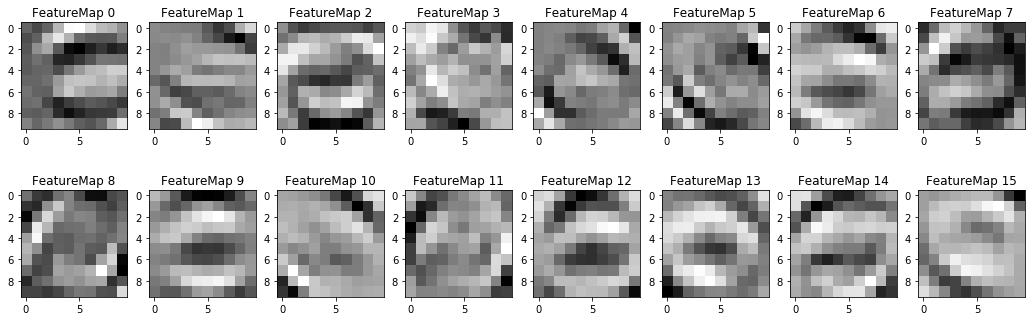

In [34]:
with tf.Session() as sess:
    X_final_graph = X_test
    saver.restore(sess, tf.train.latest_checkpoint('.'))  
    conv_layer2 = sess.graph.get_tensor_by_name('conv2:0')
    outputFeatureMap(X_final_graph,conv_layer2, activation_min=-1, activation_max=-1, plt_num=1)

#### Activation Relu 2 :

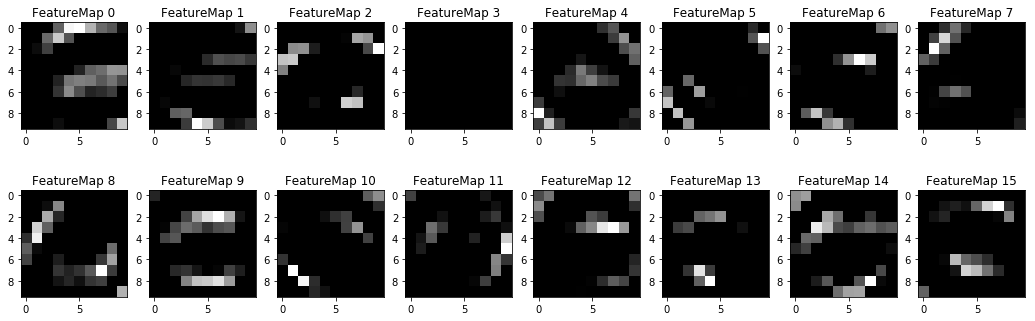

In [35]:
with tf.Session() as sess:
    X_final_graph = X_test
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    relu_layer2 = sess.graph.get_tensor_by_name('conv2_relu:0')
    outputFeatureMap(X_final_graph,relu_layer2, activation_min=-1, activation_max=-1, plt_num=1)